# Demo 1: Fractals (Part 2)

In [1]:
import numpy as np
import torch

In [2]:
print("PyTorch Version :\t", torch.__version__)
print("CUDA Available? :\t", torch.cuda.is_available())

PyTorch Version :	 2.0.1+cu118
CUDA Available? :	 True


### A. Mandelbrot Set

In [71]:
Y, X = np.mgrid[-1.3:1.3:0.002, -2:1:0.002]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to("cuda")
zs = zs.to("cuda")
ns = ns.to("cuda")

In [72]:
# Mandelbrot set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

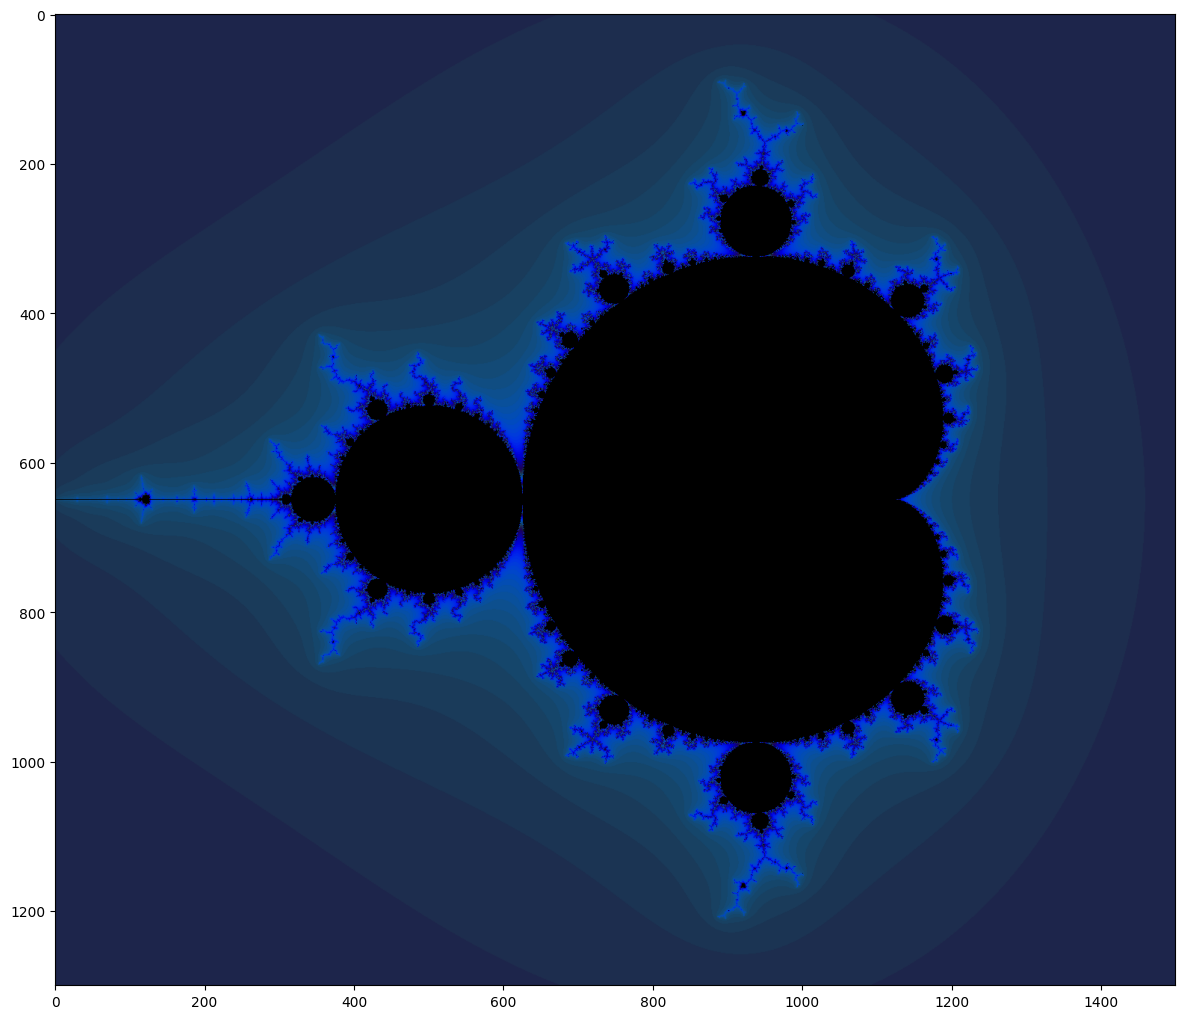

In [73]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))

def process_fractal(a):
    """Display an array of iteration counts as a colourful picture of a fractal."""
    a_cyclic = (np.pi * a / 20).reshape(list(a.shape)+[1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic), 
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a==a.abs().max()] = 0
    a = img.real
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()

High resolution computation of the set by decreasing the `mgrid` spacing and zooming to another part of the Mandelbrot set and compute the image for it.

In [68]:
Y, X = np.mgrid[-1.3:1.3:0.002, -2:1:0.002]

ZOOM_FACTOR = 0.1
X_TRANSLATE = -7.625
Y_TRANSLATE = -1.625

# Load into PyTorch tensors
x = torch.Tensor(X) + X_TRANSLATE
y = torch.Tensor(Y) + Y_TRANSLATE
z = torch.complex(x, y) * ZOOM_FACTOR
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to("cuda")
zs = zs.to("cuda")
ns = ns.to("cuda")

In [69]:
# Mandelbrot set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

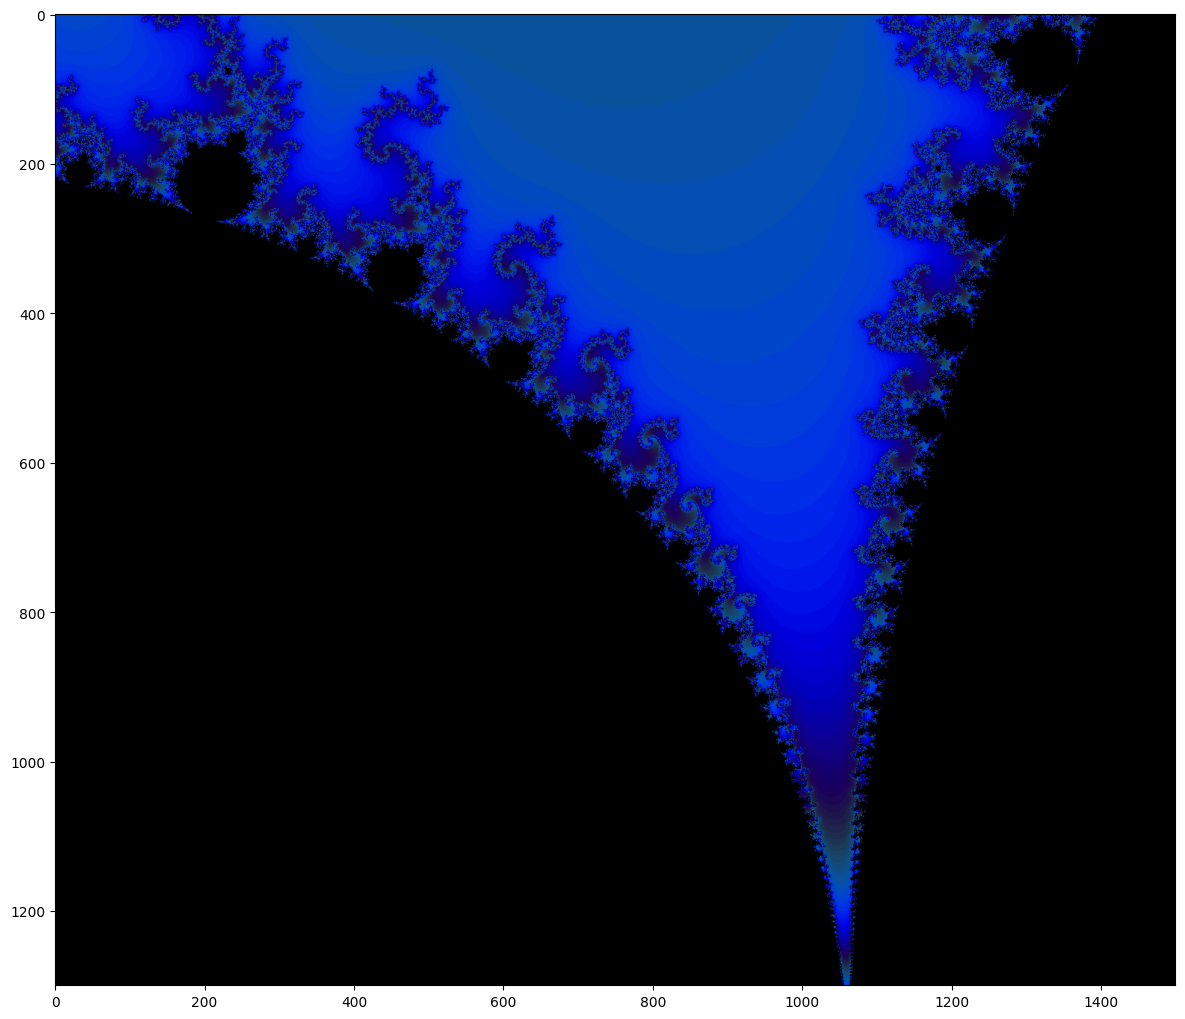

In [70]:
fig = plt.figure(figsize=(16, 10))

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()

### B. Julia Set

In [89]:
Y, X = np.mgrid[-1.3:1.3:0.002, -1.5:1.5:0.002]

ZOOM_FACTOR = 1
X_TRANSLATE = 0
Y_TRANSLATE = 0

# Load into PyTorch tensors
x = torch.Tensor(X) + X_TRANSLATE
y = torch.Tensor(Y) + Y_TRANSLATE
z = torch.complex(x, y) * ZOOM_FACTOR
zs = z.clone()
ns = torch.zeros_like(z)

# Transfer to the GPU device
z = z.to("cuda")
zs = zs.to("cuda")
ns = ns.to("cuda")

In [90]:
# Julia set w/ f_c(z) = z^2 + c
c = torch.tensor(-0.8+0.156j)
# c = torch.tensor(-0.7269+0.1889j)
for i in range(200):
    # Compute the new values of z: z^2 + c
    zs_ = zs * zs + c
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

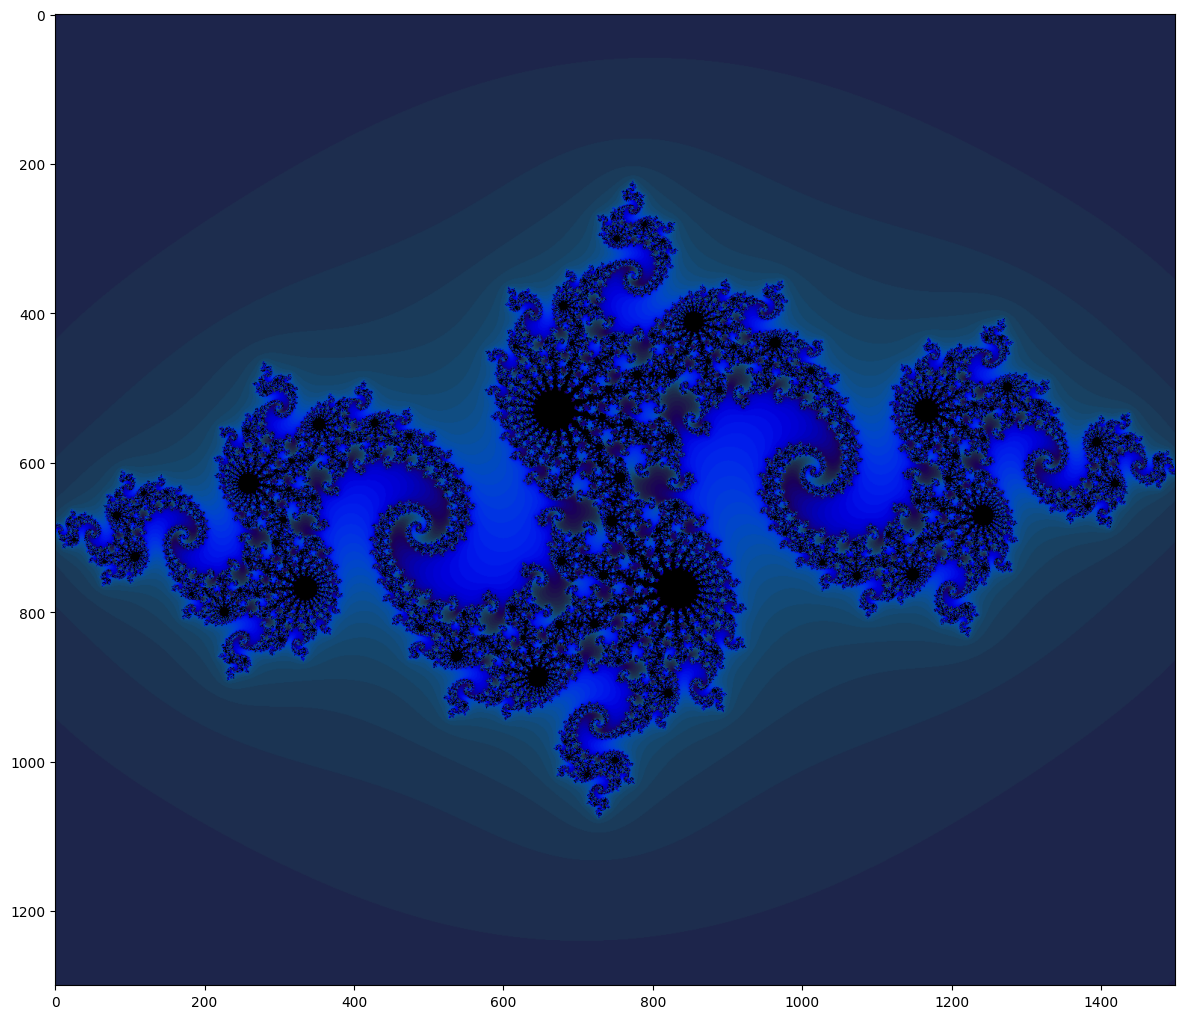

In [91]:
fig = plt.figure(figsize=(16, 10))

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()